# Thesis Plots

In [9]:
%pylab inline
import pandas as pd
from glob import glob

Populating the interactive namespace from numpy and matplotlib


## Initialisation Stuff

In [10]:
plt.rc('text', usetex=True)
plt.rc('font', family='monospace')
plt.rcParams.update({"font.size": 22})
plt.rcParams.update({"axes.grid": True})
plt.rc("figure", figsize=(10, 6))

In [11]:
notebook_dir = "/home/jimmy/Dropbox/PhDWork/Thesis/"
def plotDataDirectory(name):
    plotDir = notebook_dir + "Figures/"+name+"/PlotData/"
    ipy = get_ipython()
    ipy.magic("cd "+plotDir)

In [12]:
def inRange(dataFrame,col,valRange=(0,1)):
    return dataFrame.loc[(dataFrame[col] >= min(valRange)) & (dataFrame[col] <=max(valRange))]

## Chapter 1

## Chapter 2

## Chapter 3

In [9]:
plotDataDirectory("Chapter3")

/media/Storage/Dropbox/PhDWork/Thesis/Figures/Chapter3/PlotData


### Muquans Plots

#### Sat Spec
This is the plot of the saturated absorption spectrum taken from the Muquans laser. The X-axis is rescaled into a detuning from the 3,4 crossover in MHz

In [136]:
satData = pd.read_csv("satspec.csv",names=["X","Y"])
satData["X"] = (satData["X"] - 384.2291813694837)*1e6
satData["Y"] +=1.14
satData["X"] = satData[satData["X"]<600]

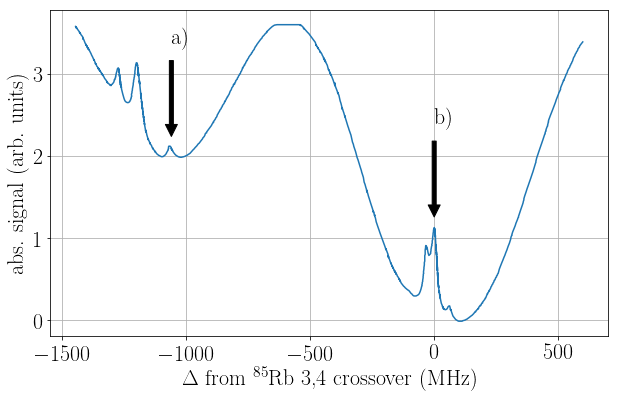

In [140]:
plot(satData["X"],satData["Y"])
plt.xlabel(r"$\Delta$ from $^{85}$Rb 3,4 crossover (MHz)")
plt.ylabel("abs. signal (arb. units)")
plt.annotate("a)",xy=(-1060,2.119207),xytext=(-1060,2.119207+1.25), arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate("b)",xy=(0,1.14),xytext=(0,2.39), arrowprops=dict(facecolor='black', shrink=0.1))
plt.savefig("../sat_spec.pdf")
plt.show()

In [110]:
inRange(satData,"X",(-1100,-1050)).max()

X   -1051.639067
Y       2.119207
dtype: float64

#### Error Signal

In [28]:
errorData = pd.read_csv("error_signal.csv",names=["X","Y"])
errorData["X"]+=2

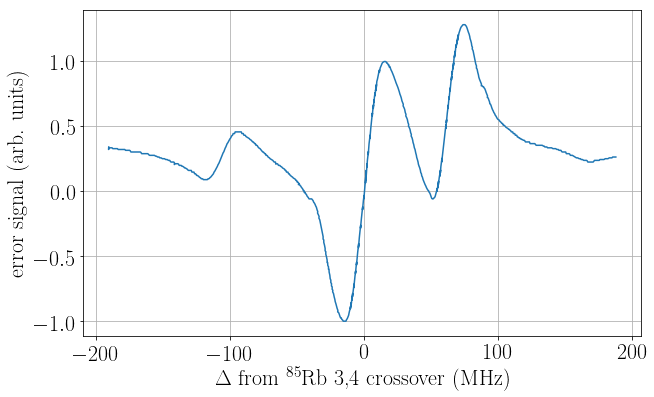

In [31]:
plot(errorData["X"],errorData["Y"])
plt.xlabel(r"$\Delta$ from $^{85}$Rb 3,4 crossover (MHz)")
plt.ylabel("error signal (arb. units)")
plt.savefig("../error_signal.pdf")

In [25]:
inRange(errorData,"Y",(-0.005,0.005))

,X,Y
293,-47.304421,0.004045
294,-46.804117,0.004045
547,46.002228,0.004045
559,52.005873,-0.002401
561,52.381101,-0.002401


## Chapter 6

In [5]:
plotDataDirectory("Chapter6")

/media/Storage/Dropbox/PhDWork/Thesis/Figures/Chapter6/PlotData


### Fringe Contrast vs Beam Width

In [7]:
fringeDF=pd.read_csv("fringeContrast.txt",sep="\t",header=None,names=["x","y"])
fringeDF["reducedContrast"] = 1-fringeDF["y"]

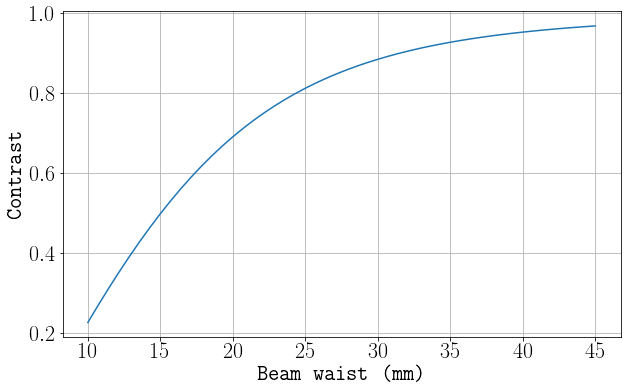

In [8]:
fringeDF.plot(x="x",y="y",logy=False,legend=False)
plt.xlabel("Beam waist (mm)")
plt.ylabel("Contrast")
plt.savefig("../fringe_contrast.pdf")

### Expected Contrast vs Phase Noise

In [14]:
phaseDF = pd.read_csv("phaseNoise.csv",header=None,names=["x","y"])

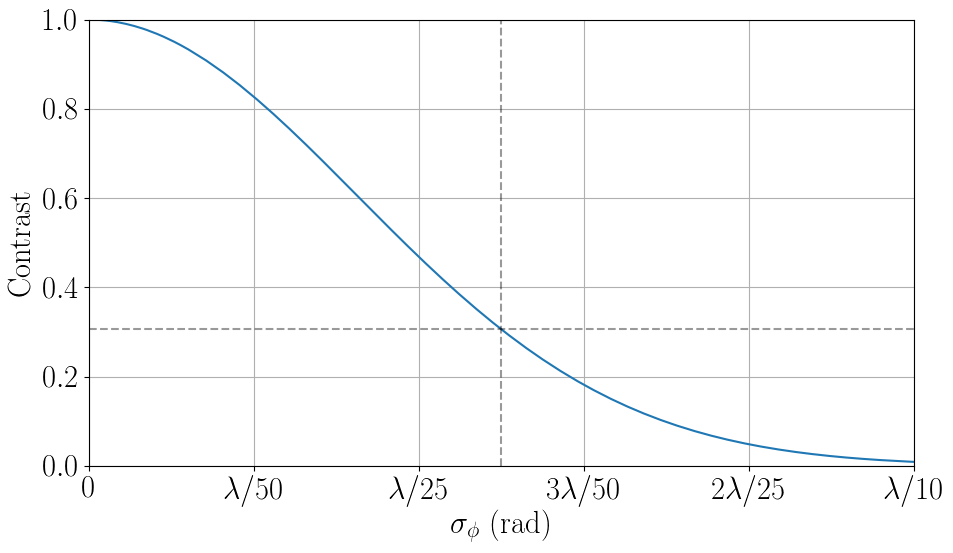

In [48]:
phaseDF.plot(x="x",y="y",logy=False,legend=False)
plt.plot([0.05,0.05],[0,1],linestyle="--",color="black",alpha=0.4)
plt.plot([0.0001,0.1],[0.305944,0.305944],linestyle="--",color="black",alpha=0.4)
plt.xlim(0,0.1)
plt.ylim(0,1.0)
plt.xticks([0,0.02,0.04,0.06,0.08,0.1],[0,r"$\lambda/50$",r"$\lambda/25$",r"$3\lambda/50$",r"$2\lambda/25$",r"$\lambda/10$"])
plt.xlabel(r"$\sigma_\phi$ (rad)")
plt.ylabel("Contrast")
plt.tight_layout()
plt.savefig("../phase_noise_contrast.pdf")

### Ray Tracing Plot

In [21]:
rayDFs = [pd.read_csv(x, names=["x","y"]) for x in glob("ray_trace*!.csv")]

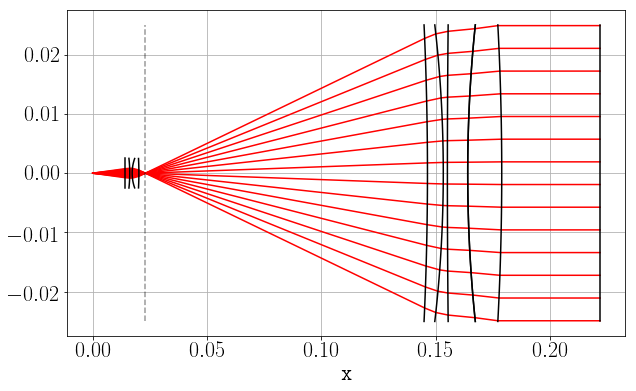

In [81]:
focus = 0.023046
ax=rayDFs[0].plot(x="x",y="y",legend=None,color='r')
for i,df in enumerate(rayDFs[1:]):
    if i < 13:
        colour = "r"
    else:
        colour = "black"
    df.plot(x="x",y="y",legend=None,ax=ax,color=colour)
ax.plot([focus,focus],[-0.025,0.025],linestyle="--",color="black",alpha=0.4)

# ax.set_ylim(-0.00001,0.00001)
# ax.set_xticklabels(list(ax.get_xticks()));
# s = ax.get_xticks()

In [6]:
tDisp = [pd.read_csv(x, names=["x","y"]) for x in glob("transverse_disp*")]
lDisp = [pd.read_csv(x, names=["x","y"]) for x in glob("longitudinal_disp*")]

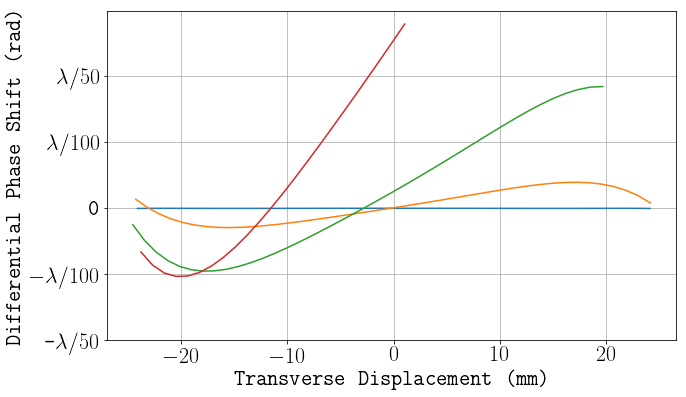

In [7]:
ax = tDisp[0].plot(x="x",y="y",legend=False)
for a in tDisp[1:]:
    a.plot(x="x",y="y",ax=ax,legend=False)
plt.xlabel("Transverse Displacement (mm)")
plt.yticks([-0.02,-0.01,0,0.01,0.02],[r"-$\lambda/50$",r"$-\lambda/100$",0,r"$\lambda/100$",r"$\lambda/50$"])
plt.ylabel("Differential Phase Shift (rad)");
plt.tight_layout()
plt.savefig("../wavefront_transverse.pdf")

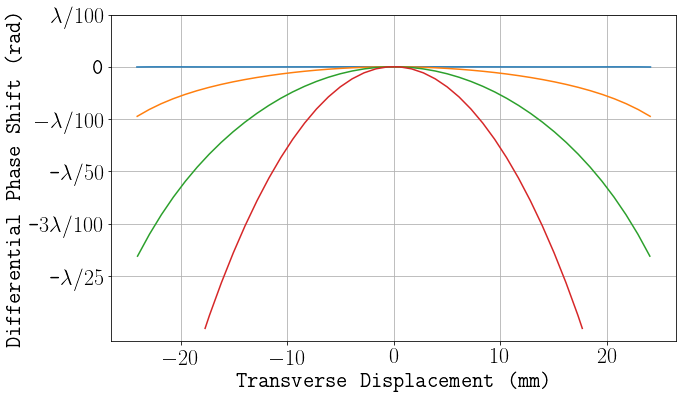

In [8]:
ax = lDisp[0].plot(x="x",y="y",legend=False)
for a in lDisp[1:]:
    a.plot(x="x",y="y",ax=ax,legend=False)
plt.xlabel("Transverse Displacement (mm)")
plt.yticks([-0.04,-0.03,-0.02,-0.01,0,0.01],[r"-$\lambda/25$",r"-$3\lambda/100$",r"-$\lambda/50$",r"$-\lambda/100$",0,r"$\lambda/100$"])
plt.ylabel("Differential Phase Shift (rad)");
plt.tight_layout()
plt.savefig("../wavefront_longitudinal.pdf")

### Collimation

### Waveplate Thickness

In [31]:
waveplate = genfromtxt("waveplate.csv", delimiter=",")

In [52]:
vals = waveplate.flatten()
m=vals[~isnan(vals)].mean()
w_avg=waveplate-m

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


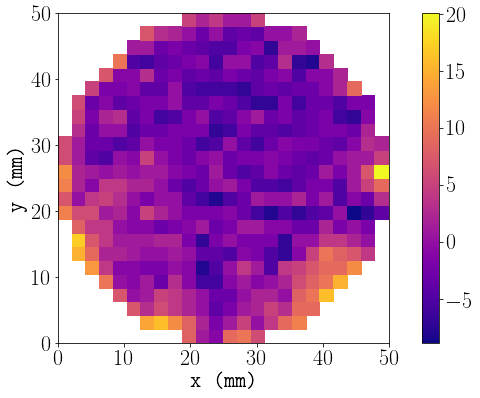

In [75]:
xrange = linspace(0,50,25)
plt.pcolormesh(xrange,xrange,w_avg,cmap="plasma")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()
plt.axes().set_aspect('equal')
plt.tight_layout()
plt.savefig("../waveplate.pdf")

In [80]:
vals[~isnan(vals)].std()* 1.4537/780

0.008615096508913622

In [81]:
max(vals[~isnan(vals)]) - min(vals[~isnan(vals)])

29.0

### Simplex Algorithm

In [6]:
fullScan = pd.read_csv("collimatorFixed.lvm",delimiter="\t",names=["NA","Horiz Volt","Vert Volt","Power"])
fullScan = fullScan.drop("NA",axis=1)
fibreExamp = pd.read_csv("fibre_alignment_example.txt",names=["Horiz Volt","Vert Volt","Power"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


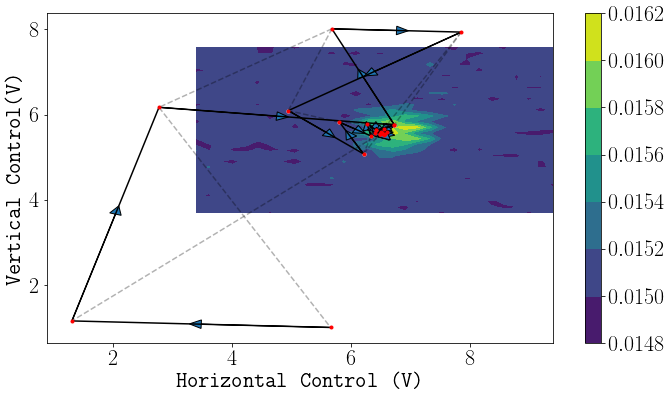

In [7]:
x=np.linspace(min(fullScan["Horiz Volt"])-0.6,max(fullScan["Horiz Volt"])-.6,30)
y=np.linspace(min(fullScan["Vert Volt"])-.3,max(fullScan["Vert Volt"])-.3,30)
z=fullScan["Power"].reshape(30,30)
contourf(x,y,z)
plt.colorbar()
scatter(fibreExamp["Horiz Volt"],fibreExamp["Vert Volt"],s=10,c=[1,1,1])
ax = plt.gca()
for i,el in fibreExamp.iterrows():
    data=(fibreExamp.loc[i:i+2].append(el))
    plot(data["Horiz Volt"][0:2], data["Vert Volt"][0:2],linestyle="-", color="black")
    plot(data["Horiz Volt"][2:],data["Vert Volt"][2:],linestyle="--", color="black", alpha=0.3)
    #ax.fill_between(data["Horiz Volt"], data["Vert Volt"],alpha=0.3)
    if i < len(fibreExamp)-1:
        plt.arrow(el["Horiz Volt"], el["Vert Volt"],(fibreExamp["Horiz Volt"].iloc[i+1]-el["Horiz Volt"])/2, (fibreExamp["Vert Volt"].iloc[i+1]-el["Vert Volt"])/2,head_width=0.2, head_length=0.2)

plot(fibreExamp["Horiz Volt"], fibreExamp["Vert Volt"], "r.")
plt.xlabel("Horizontal Control (V)")
plt.ylabel("Vertical Control(V)")

plt.tight_layout()
plt.grid()
plt.savefig("../simplex_alignment.pdf")

In [22]:
fibreExamp[fibreExamp["Power"]>0.016712]

,Horiz Volt,Vert Volt,Power
21,6.497755,5.539379,0.016717


In [47]:
fCoords=fibreExamp.tail()[["Horiz Volt", "Vert Volt"]].values
pCoords = power[power[2]>0.016162][[0,1]].values

In [48]:
fCoords-pCoords

array([[ 0.20120342, -0.16062166],
       [ 0.18853461, -0.14765123],
       [ 0.18853461, -0.14765123],
       [ 0.22422119, -0.14352032],
       [ 0.23688999, -0.15649076]])

In [36]:
power = list(reversed(list(z.flatten())))
coords=np.array([(x1,y1,power.pop()) for x1 in x for y1 in y])

power = pd.DataFrame(coords)

,0,1
435,6.296552,5.7


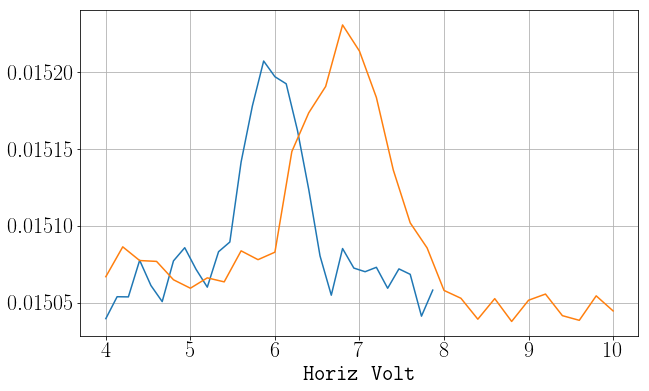

In [97]:
fullScan.groupby("Vert Volt")["Power"].mean().plot(x="Horiz Volt", y="Power")
fullScan.groupby("Horiz Volt")["Power"].mean().plot(x="Vert Volt", y="Power")

### Next Section Here

In [95]:
fullScan.groupby("Vert Volt").mean()

,Horiz Volt,Power
Vert Volt,,
4.000000,6.9,0.015040
4.133333,7.1,0.015054
4.266667,6.9,0.015054
4.400000,7.1,0.015078
4.533333,6.9,0.015061
4.666667,7.1,0.015051
4.800000,6.9,0.015077
4.933333,7.1,0.015086
5.066667,6.9,0.015072
